In [2]:
# -----------------------
# Step 1: Import necessary libraries
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
# -----------------------
# Step 2: Load the Dataset
# -----------------------

# Load the dataset
df = pd.read_csv('loan_data.csv')

# Display the first few rows to understand the structure
print(df.head())

# Display basic info about the dataset
print(df.info())

# Display summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

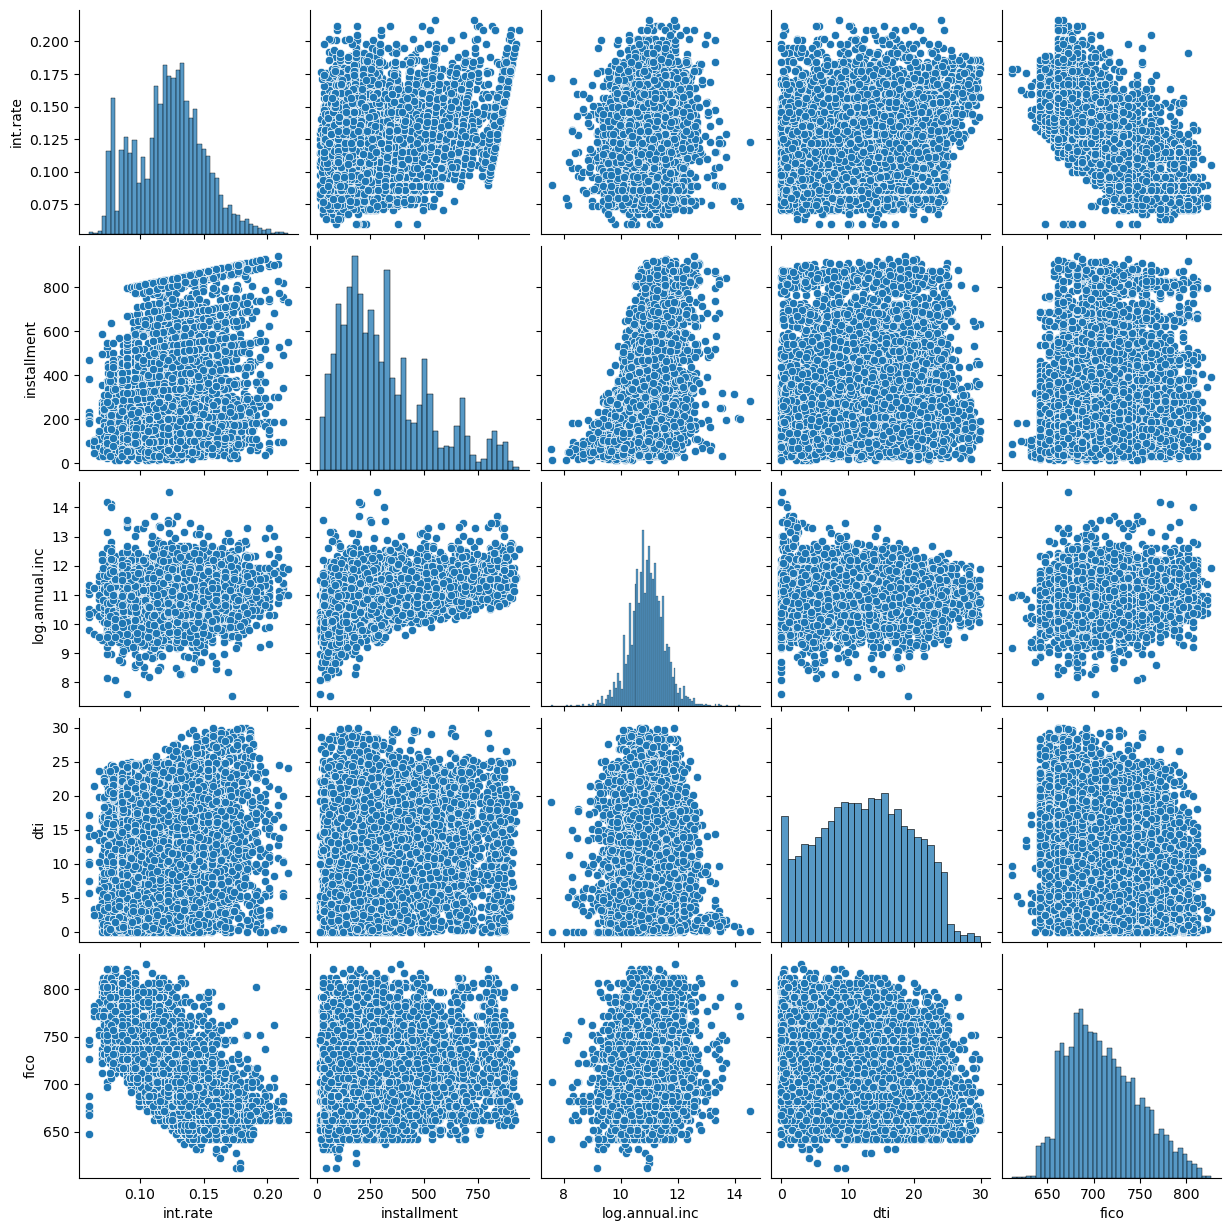

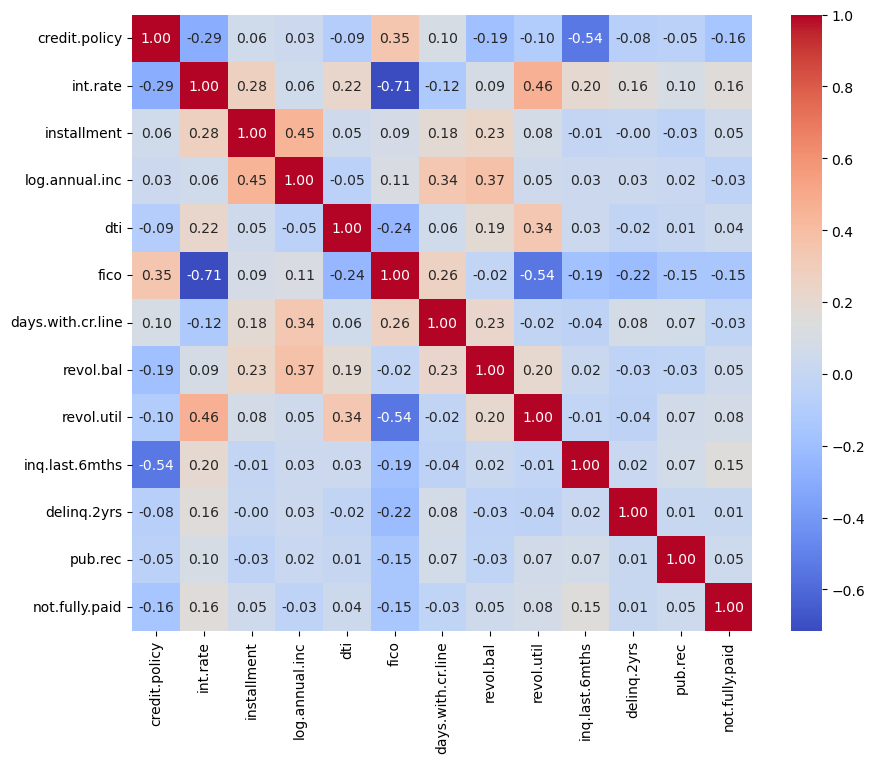

In [6]:
# -----------------------
# Step 3: Data Exploration
# -----------------------

# Visualizing the distribution of numeric columns using pairplot
sns.pairplot(df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico']])
plt.show()

# Visualizing the correlation matrix for numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Selecting only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [8]:
# -----------------------
# Step 4: Handle Categorical Variables
# -----------------------

# One-Hot Encoding for 'purpose' column to handle categorical data
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Display the first few rows after encoding
print(df.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0     

In [10]:
# -----------------------
# Step 5: Data Standardization
# -----------------------

# Standardize numerical columns: 'fico', 'log.annual.inc', 'dti'
scaler = StandardScaler()
df[['fico', 'log.annual.inc', 'dti']] = scaler.fit_transform(df[['fico', 'log.annual.inc', 'dti']])

# Display the first few rows after standardization
print(df[['fico', 'log.annual.inc', 'dti']].head())


       fico  log.annual.inc       dti
0  0.688825        0.680388  0.998505
1 -0.101303        0.244031  0.244540
2 -0.759742       -0.908659 -0.141885
3  0.030385        0.680388 -0.654697
4 -1.154806        0.597961  0.343326


In [12]:
# -----------------------
# Step 6: Split the Data into Features (X) and Target (y)
# -----------------------

# Split the data into features (X) and target variable (y)
X = df.drop('not.fully.paid', axis=1)  # Features
y = df['not.fully.paid']  # Target variable

# Display the shape of features and target
print(X.shape, y.shape)


(9578, 18) (9578,)


In [14]:
# -----------------------
# Step 7: Train-Test Split (70% train, 30% test)
# -----------------------

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of train and test sets
print(X_train.shape, X_test.shape)


(6704, 18) (2874, 18)


In [16]:
# -----------------------
# Step 8: Train a Logistic Regression and Random Forest Model
# -----------------------

# Standardizing the features (scaling data to have mean=0 and std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [18]:
# -----------------------
# Step 9: Evaluate the Models
# -----------------------

# Evaluate Logistic Regression Model
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

# Evaluate Random Forest Model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Logistic Regression Model Accuracy: 0.8382045929018789
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.52      0.03      0.06       466

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.49      2874
weighted avg       0.79      0.84      0.77      2874

Logistic Regression Confusion Matrix:
 [[2394   14]
 [ 451   15]]
Random Forest Model Accuracy: 0.8354210160055672
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.35      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.59      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874

Random Forest Confusion Matrix:
 [[2393   15]
 [ 458    8]]


In [36]:
# -----------------------
# Step 10: Model Tuning
# -----------------------

# Logistic Regression Hyperparameter Tuning using GridSearchCV
model_logistic = LogisticRegression(max_iter=2000)

param_grid_logistic = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

grid_search_logistic = GridSearchCV(estimator=model_logistic, param_grid=param_grid_logistic, cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search_logistic.fit(X_train_scaled, y_train)

# Best Parameters for Logistic Regression
print("Best Parameters for Logistic Regression: ", grid_search_logistic.best_params_)

# Best model for Logistic Regression
best_model_logistic = grid_search_logistic.best_estimator_

# Evaluate the optimized Logistic Regression model
y_pred_logistic = best_model_logistic.predict(X_test_scaled)

# Print Evaluation Metrics for Logistic Regression
print("Optimized Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Optimized Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))

# Define Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Grid search for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Best Parameters for Random Forest
print("Best Parameters for Random Forest: ", grid_search_rf.best_params_)

# Best model for Random Forest
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the optimized Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Print Evaluation Metrics for Random Forest
print("Optimized Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Optimized Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for Logistic Regression:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Optimized Logistic Regression Model Accuracy: 0.8382045929018789
Optimized Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.52      0.03      0.06       466

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.49      2874
weighted avg       0.79      0.84      0.77      2874

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for Random Forest:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Model Accuracy: 0.8385525400139179
Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00     

In [37]:
# -----------------------
# Step 11: Evaluate the Optimized Models
# -----------------------

# Evaluate Logistic Regression Model
y_pred_logistic = log_reg_grid_search.best_estimator_.predict(X_test_scaled)
print("Optimized Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Optimized Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Optimized Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

# Evaluate Random Forest Model
y_pred_rf = rf_grid_search.best_estimator_.predict(X_test_scaled)
print("Optimized Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Optimized Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Optimized Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Optimized Logistic Regression Model Accuracy: 0.8382045929018789
Optimized Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.52      0.03      0.06       466

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.49      2874
weighted avg       0.79      0.84      0.77      2874

Optimized Logistic Regression Confusion Matrix:
 [[2394   14]
 [ 451   15]]
Optimized Random Forest Model Accuracy: 0.837508698677801
Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.46      0.01      0.03       466

    accuracy                           0.84      2874
   macro avg       0.65      0.50      0.47      2874
weighted avg       0.78      0.84      0.77      2874

Optimized Random Forest Confusion Matrix:
 [[

Top 10 Important Features (Logistic Regression):
                      Feature  Importance
2                installment    0.255445
9             inq.last.6mths    0.181970
17    purpose_small_business    0.124033
7                  revol.bal    0.093312
11                   pub.rec    0.072915
15  purpose_home_improvement    0.044687
8                 revol.util    0.044245
14       purpose_educational    0.037922
6          days.with.cr.line    0.037415
1                   int.rate    0.019943


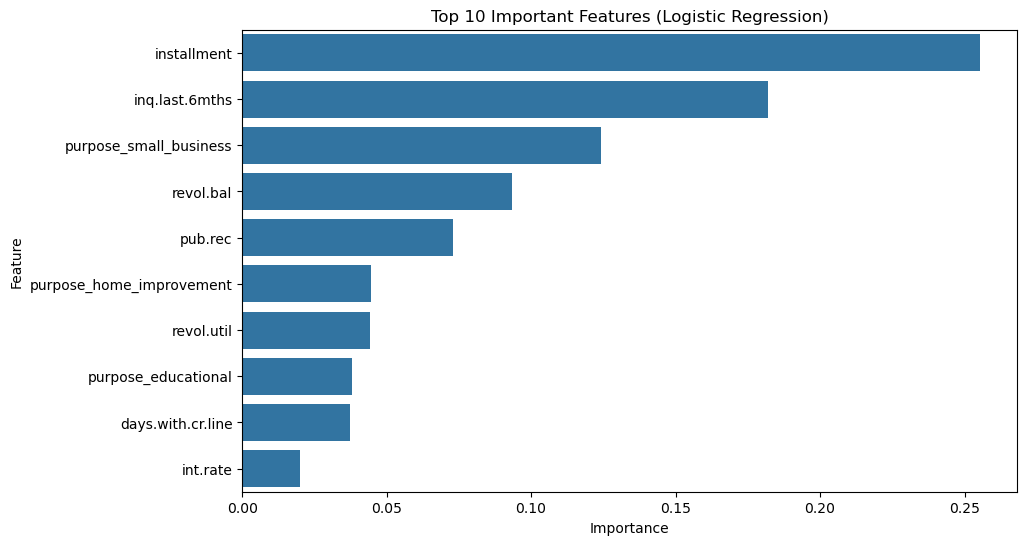

Top 10 Important Features (Random Forest):
              Feature  Importance
1           int.rate    0.111281
2        installment    0.107958
6  days.with.cr.line    0.102583
3     log.annual.inc    0.101422
8         revol.util    0.099507
7          revol.bal    0.095365
4                dti    0.093503
5               fico    0.086238
9     inq.last.6mths    0.083947
0      credit.policy    0.044376


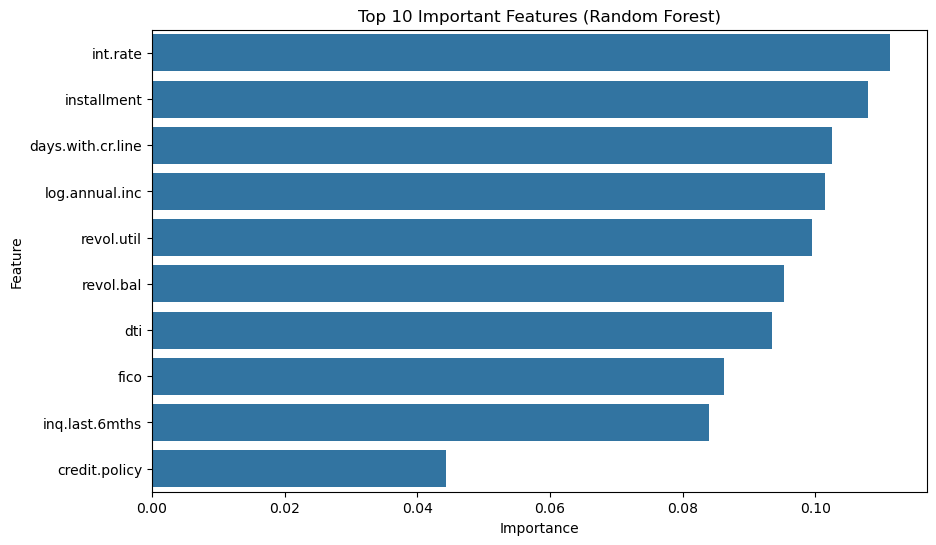

In [42]:
# -----------------------
# Step 12: Feature Importance
# -----------------------

# Feature importance for Logistic Regression (using the coefficients)
importances_logistic = best_model_logistic.coef_[0]  # Get the coefficients from Logistic Regression
feature_names = X_train.columns

# Create a DataFrame for Logistic Regression feature importance
feature_importance_logistic_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_logistic
})

# Sort the DataFrame by importance
feature_importance_logistic_df = feature_importance_logistic_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features for Logistic Regression
print("Top 10 Important Features (Logistic Regression):\n", feature_importance_logistic_df.head(10))

# Create a bar plot for Logistic Regression feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_logistic_df.head(10))
plt.title('Top 10 Important Features (Logistic Regression)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Feature importance for Random Forest (using the feature_importances_ attribute)
importances_rf = best_rf_model.feature_importances_  # Get feature importances from Random Forest

# Create a DataFrame for Random Forest feature importance
feature_importance_rf_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
})

# Sort the DataFrame by importance
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features for Random Forest
print("Top 10 Important Features (Random Forest):\n", feature_importance_rf_df.head(10))

# Create a bar plot for Random Forest feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf_df.head(10))
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [46]:
# -----------------------
# Step 13: Predict a New Scenario
# -----------------------

# Let's imagine we want to predict whether a new loan will be fully paid or not, based on the following data:
new_data = pd.DataFrame({
    'credit.policy': [1],
    'int.rate': [0.13],
    'installment': [350.0],
    'log.annual.inc': [11.0],
    'dti': [15.0],
    'fico': [700],
    'days.with.cr.line': [3500],
    'revol.bal': [5000],
    'revol.util': [55.0],
    'inq.last.6mths': [1],
    'delinq.2yrs': [0],
    'pub.rec': [0],
    'purpose': ['debt_consolidation']  # You need to add this column to match the one-hot encoding
})

# 1. Apply one-hot encoding for 'purpose' column just like the training data.
new_data_encoded = pd.get_dummies(new_data, columns=['purpose'], drop_first=True)

# 2. Ensure that new data has the same columns as the training data.
missing_cols = set(X_train.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0  # Adding missing columns with default value 0

# Reorder the columns to match the training data column order
new_data_encoded = new_data_encoded[X_train.columns]

# 3. Apply the same scaling to the new data
new_data_scaled = scaler.transform(new_data_encoded)

# 4. Use the best Logistic Regression model or Random Forest model for prediction
# Here we use best_model_logistic based on your previous code:
prediction = best_model_logistic.predict(new_data_scaled)

# 5. Output the prediction with more understandable labels
if prediction[0] == 0:
    print("The loan is predicted to be fully paid.")
else:
    print("The loan is predicted to not be fully paid.")


The loan is predicted to be fully paid.
